<a href="https://colab.research.google.com/github/Sid2601/Air_Quality-Prediction-using-PCA/blob/master/Air_Quality_Prediction_with_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

In [17]:
air_data = pd.read_excel('/content/AirQualityUCI.xlsx')
air_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [18]:
scaler=MinMaxScaler()
X=air_data.drop(['Date', 'Time','AH'], axis=1)
X=scaler.fit_transform(X)
print(X)
Y=air_data.AH
print(Y)

[[0.95611137 0.69650631 0.25197984 ... 0.53897714 0.87326247 0.86197939]
 [0.95327985 0.66625739 0.22462203 ... 0.43053898 0.87203598 0.85790977]
 [0.95422369 0.7152584  0.20734341 ... 0.46790928 0.86631235 0.87964326]
 ...
 [0.95516753 0.59917401 0.         ... 0.47452025 0.92763696 0.75625595]
 [0.95375177 0.53689028 0.         ... 0.35616564 0.93346279 0.73963114]
 [0.95422369 0.56736243 0.         ... 0.37315214 0.93417825 0.73815915]]
0       0.757754
1       0.725487
2       0.750239
3       0.786713
4       0.788794
          ...   
9352    0.756824
9353    0.711864
9354    0.640649
9355    0.513866
9356    0.502804
Name: AH, Length: 9357, dtype: float64


In [69]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
pca.get_covariance()
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.4263395 , 0.35139688])

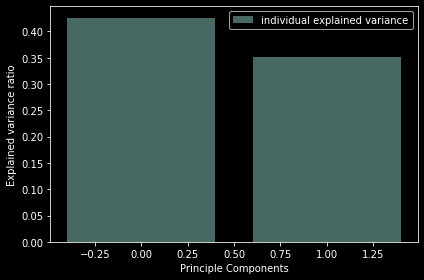

In [70]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(6,4))
  plt.bar(range(2), explained_variance, alpha=0.5, align = 'center', label = 'individual explained variance')
  plt.ylabel('Explained variance ratio')
  plt.xlabel('Principle Components')
  plt.legend(loc='best')
  plt.tight_layout()

In [71]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, Y, test_size = 0.3, random_state=2)

In [72]:
model = Sequential()
model.add(Dense(300,input_shape=(2,),activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(Adam(lr=0.01),'mean_squared_error')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 300)               900       
_________________________________________________________________
dense_31 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_32 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_33 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 11        
Total params: 36,571
Trainable params: 36,571
Non-trainable params: 0
_________________________________________________________________


In [73]:
r=model.fit(X_train_new,y_train,epochs=100)


Epoch 1/100
205/205 [==============================] - 0s 2ms/step - loss: 81.9468
Epoch 2/100
205/205 [==============================] - 0s 2ms/step - loss: 43.4126
Epoch 3/100
205/205 [==============================] - 0s 2ms/step - loss: 2.1260
Epoch 4/100
205/205 [==============================] - 0s 2ms/step - loss: 0.2578
Epoch 5/100
205/205 [==============================] - 0s 2ms/step - loss: 0.1958
Epoch 6/100
205/205 [==============================] - 0s 2ms/step - loss: 0.4716
Epoch 7/100
205/205 [==============================] - 0s 2ms/step - loss: 0.3946
Epoch 8/100
205/205 [==============================] - 0s 2ms/step - loss: 2.0070
Epoch 9/100
205/205 [==============================] - 0s 2ms/step - loss: 10.5926
Epoch 10/100
205/205 [==============================] - 0s 2ms/step - loss: 3.1515
Epoch 11/100
205/205 [==============================] - 0s 2ms/step - loss: 1.7778
Epoch 12/100
205/205 [==============================] - 0s 2ms/step - loss: 0.4280
Epoch 13/1

In [74]:
result = model.evaluate(X_test_new, y_test)
print(result)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

88/88 [==============================] - 0s 1ms/step - loss: 0.1053
0.10533200949430466
Accuracy : 0.8946679905056953


#Output According PCA

1) n_components = 12 : -->Accuracy: 0.888292983174324

2) n_components = 10 : -->Accuracy:0.9939798484556377

3) n_components = 8  : -->Accuracy: 0.9157441258430481

4) n_components = 5  : -->Accuracy: 0.9573804698884487

5) n_components = 2  : -->Accuracy :0.7397066354751587

In [75]:
his.append(r.history['loss'])

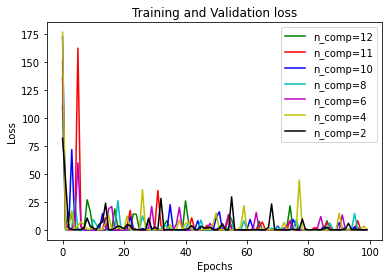

In [76]:
plt.plot(his[0],'g',label='n_comp=12')
plt.plot(his[1],'r',label='n_comp=11')
plt.plot(his[2],'b',label='n_comp=10')
plt.plot(his[3],'c',label='n_comp=8')
plt.plot(his[4],'m',label='n_comp=6')
plt.plot(his[5],'y',label='n_comp=4')
plt.plot(his[6],'k',label='n_comp=2')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
his[0]

[110.59368133544922,
 0.09647952765226364,
 16.00242805480957,
 11.705196380615234,
 0.0422818586230278,
 0.03139782324433327,
 0.011698205024003983,
 0.11340592801570892,
 26.971158981323242,
 16.540868759155273,
 0.06861352175474167,
 0.025639547035098076,
 0.14158204197883606,
 0.13443714380264282,
 0.02873937599360943,
 0.011701718904078007,
 0.5809817910194397,
 18.765073776245117,
 2.0785584449768066,
 0.16153782606124878,
 0.013584215193986893,
 0.009561106562614441,
 0.01736605539917946,
 14.228955268859863,
 13.921394348144531,
 0.30213311314582825,
 0.0033336877822875977,
 0.0027611374389380217,
 0.002763085998594761,
 0.0027420322876423597,
 0.003910731989890337,
 0.020393401384353638,
 0.134703129529953,
 4.069443702697754,
 8.314355850219727,
 0.004413549322634935,
 0.0022311965003609657,
 0.0017615642864257097,
 0.001902892952784896,
 0.004751453176140785,
 26.05847930908203,
 6.799603462219238,
 0.008084543980658054,
 0.0024430034682154655,
 0.002103612059727311,
 0.0012